In [50]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 시드 고정
np.random.seed(42)

In [51]:
# 엑셀 파일 읽기
df = pd.read_excel('happiness_world.xlsx')
df.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
0,Finland,7.8042,1.888380,1.584900,0.534574,0.771510,0.126331,0.535299,2.363241,2023
1,Denmark,7.5864,1.949406,1.547875,0.537302,0.734416,0.208459,0.525221,2.083766,2023
2,Iceland,7.5296,1.925508,1.619666,0.559096,0.738164,0.249635,0.187119,2.250382,2023
3,Israel,7.4729,1.833398,1.520674,0.576730,0.568518,0.124048,0.158292,2.691290,2023
4,Netherlands,7.4030,1.942274,1.488228,0.545473,0.672327,0.250547,0.394062,2.110044,2023


In [28]:
# 데이터 형상 파악하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1367 non-null   object 
 1   Score                         1367 non-null   float64
 2   GDP per capita                1367 non-null   float64
 3   Social support                1367 non-null   float64
 4   Healthy life expectancy       1366 non-null   float64
 5   Freedom to make life choices  1367 non-null   float64
 6   Generosity                    1367 non-null   float64
 7   Perceptions of corruption     1367 non-null   float64
 8   Dystopia + residual           1366 non-null   float64
 9   Year                          1367 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 106.9+ KB


In [29]:
df.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
count,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000
mean,5.441075,1.018953,1.045709,0.584113,0.451045,0.196327,0.132310,2.013121,2018.903438
std,1.117911,0.452932,0.331153,0.245165,0.156781,0.113328,0.112522,0.572140,2.561006
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.109798,2015.000000
25%,4.599550,0.696538,0.832460,0.402302,0.356221,0.114778,0.056904,1.673810,2017.000000
50%,5.440000,1.042803,1.083367,0.612830,0.467735,0.182591,0.097317,2.025512,2019.000000
75%,6.256500,1.338358,1.299984,0.777614,0.569114,0.252900,0.166181,2.390476,2021.000000
max,7.842100,2.209395,1.644378,1.140899,0.771510,0.838075,0.586828,3.837715,2023.000000


In [30]:
df.isnull().sum()

Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             1
Year                            0
dtype: int64

In [52]:
df = df.dropna()
df.isnull().sum()

Country                         0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
Year                            0
dtype: int64

<ipython-input-32-27e21694d27e>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



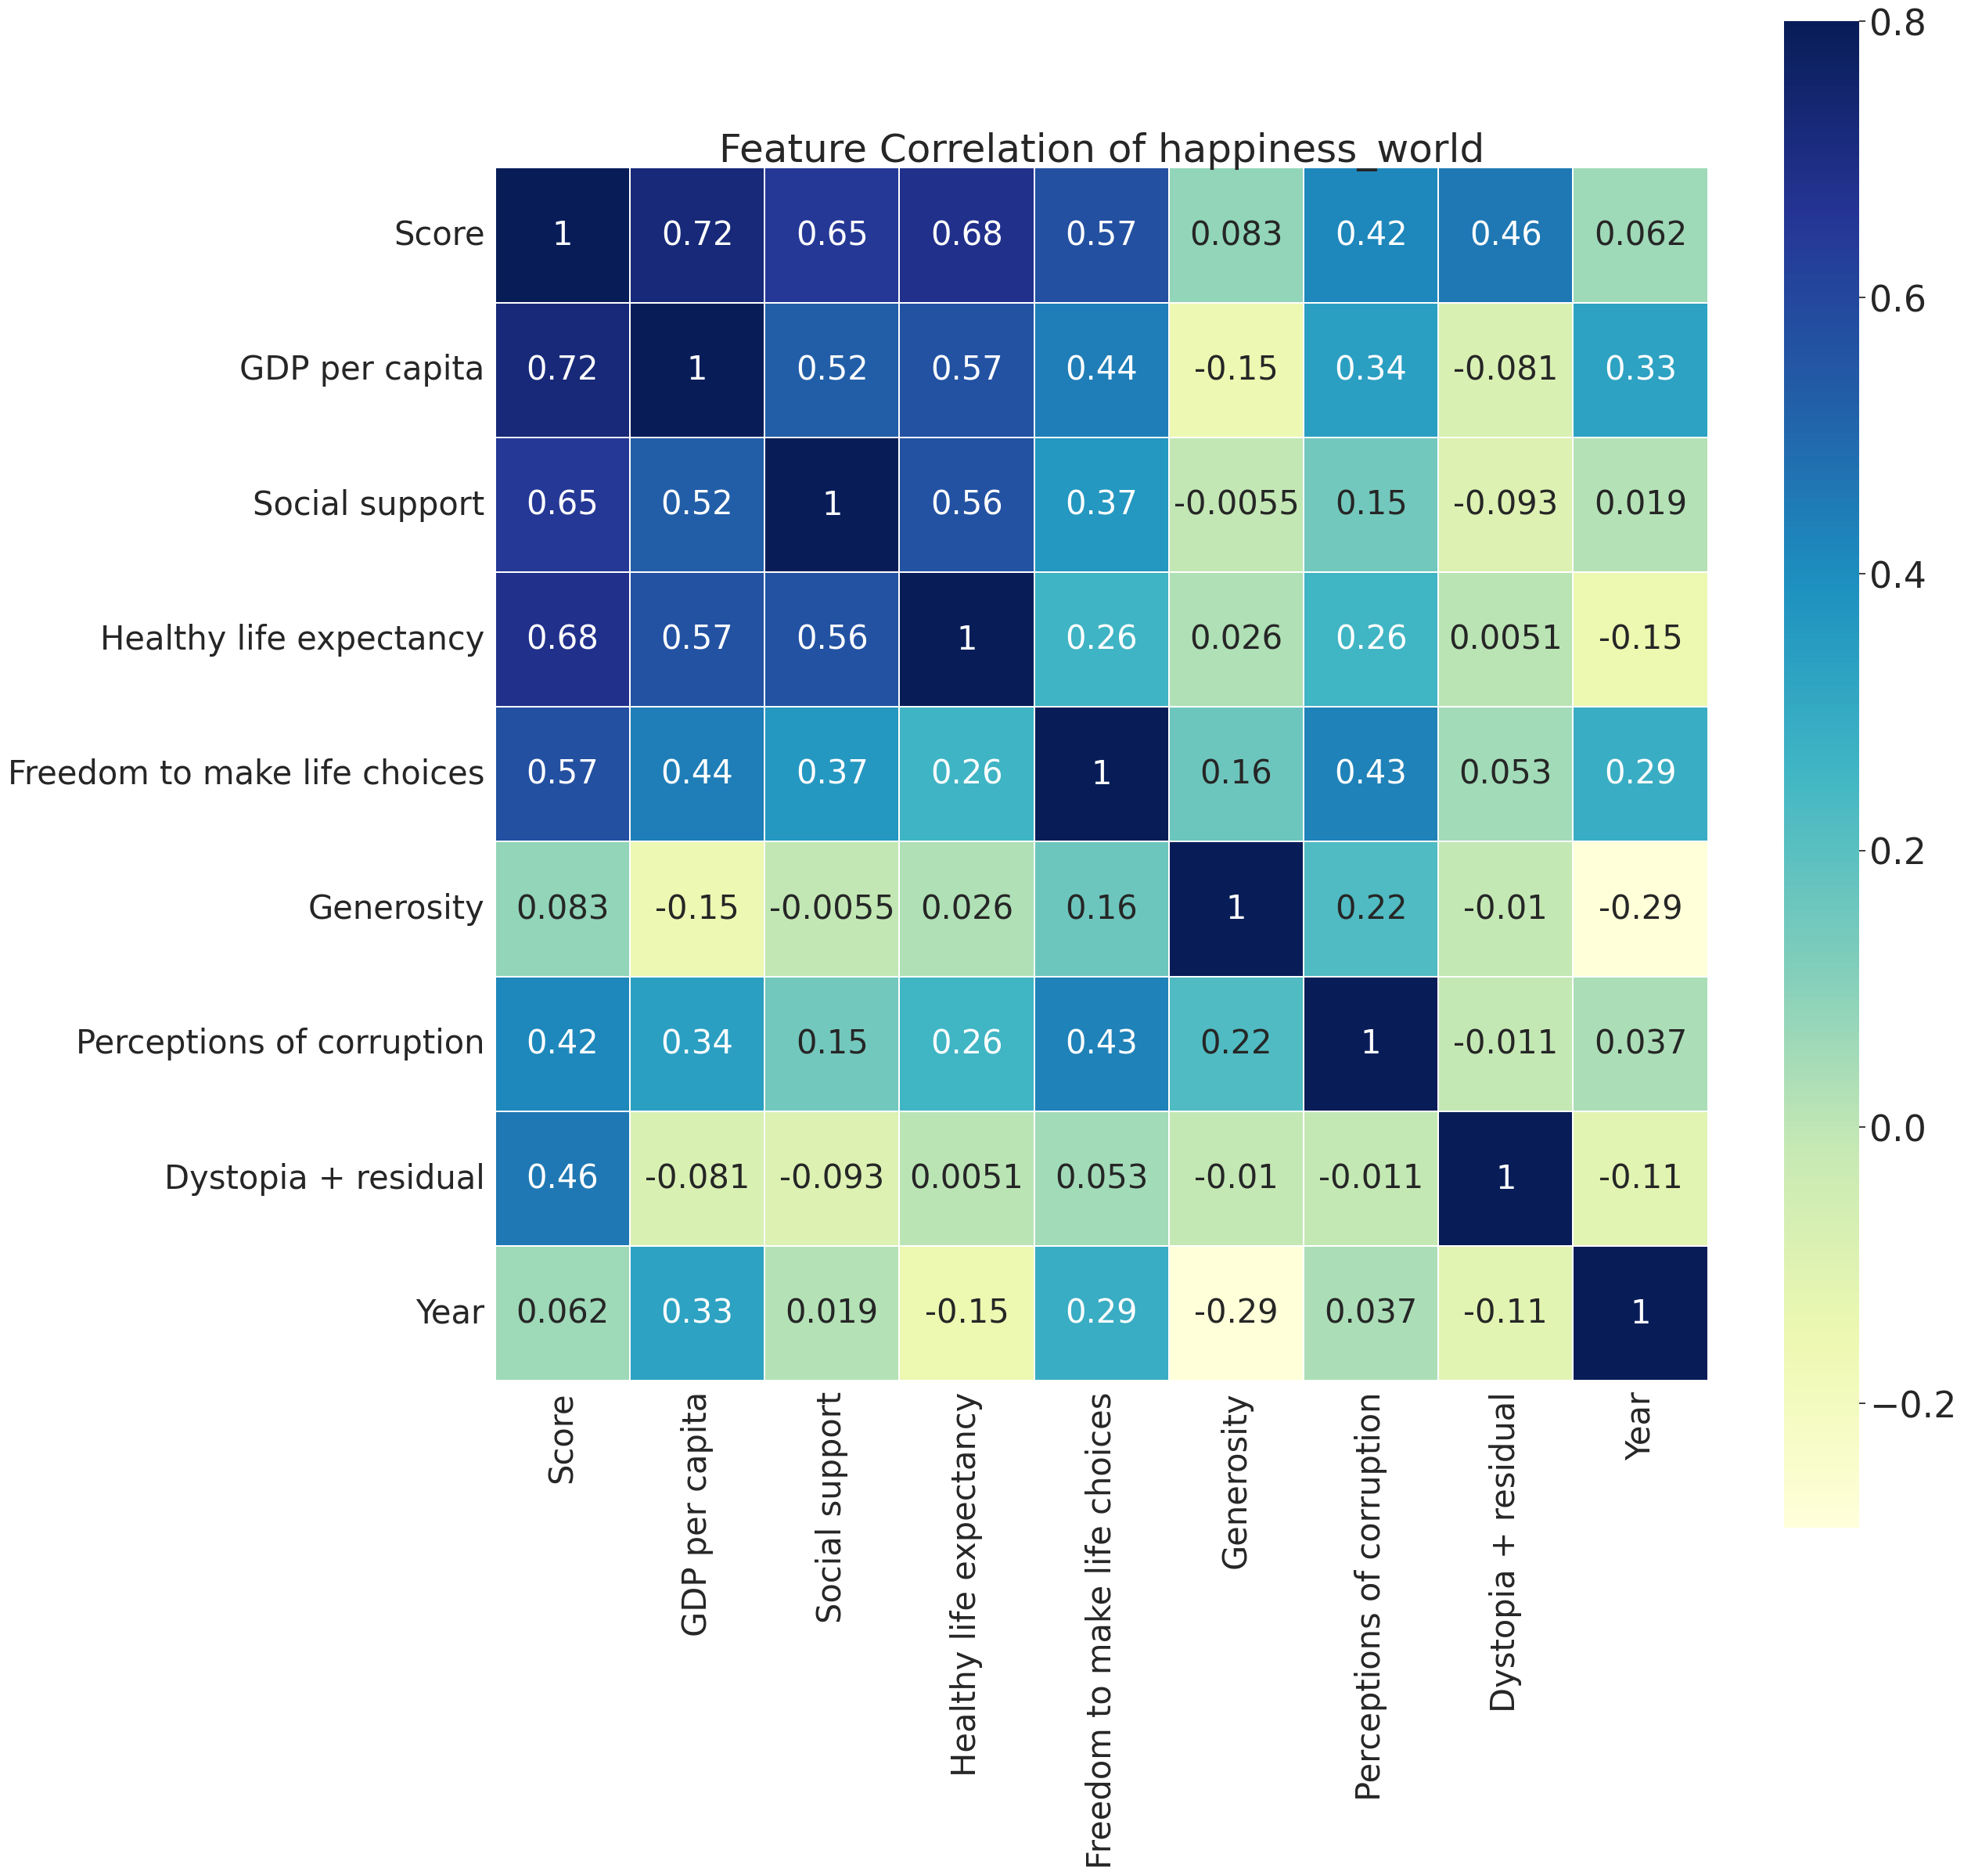

In [32]:
# Correlation Analysis

corr = df.corr()
sns.set(font_scale=3)
plt.figure(figsize=(25, 25));
ax = sns.heatmap(corr,
            vmax=0.8,
            linewidths=0.1,
            square=True,
            annot=True,
            cmap='YlGnBu',
            annot_kws={"size": 30})
ax.tick_params(labelsize=30)

plt.title('Feature Correlation of happiness_world');
plt.show()

<ipython-input-57-3b0cca61cf4a>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




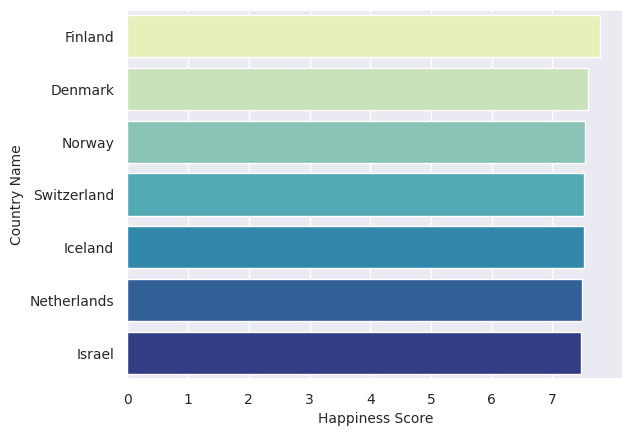

<Figure size 2500x2000 with 0 Axes>

In [57]:
# 행복한 국가/지역 Top 7
sns.barplot(x='Score',y='Country',data=df.nlargest(40, 'Score'), palette='YlGnBu', ci=None, dodge=False)

# 변수 이름 조정
plt.xlabel('Happiness Score', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Country Name', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 변수 간 눈금 표시
plt.xticks(range(0, 8, 1))

plt.figure(figsize=(25, 20))

# 그래프 출력
plt.show()

<ipython-input-56-7a6e1e471b96>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




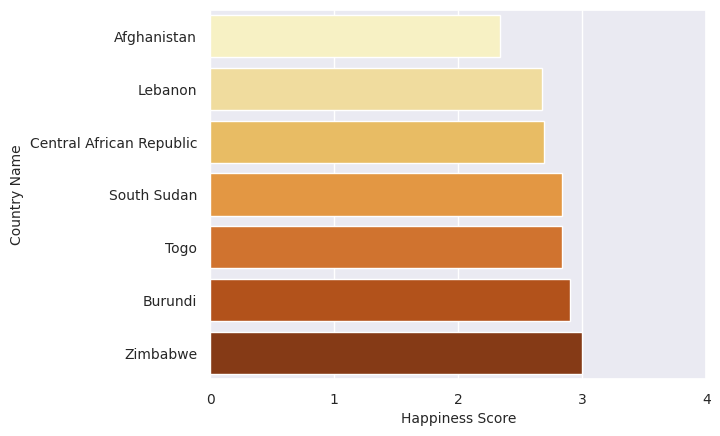

<Figure size 2500x2000 with 0 Axes>

In [56]:
# 행복한 국가/지역 Top 7
sns.barplot(x='Score',y='Country',data=df.nsmallest(15, 'Score'), palette='YlOrBr', ci=None, dodge=False)

# 변수 이름 조정
plt.xlabel('Happiness Score', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Country Name', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 변수 간 눈금 표시
plt.xticks(range(0, 5, 1))

plt.figure(figsize=(25, 20))

# 그래프 출력
plt.show()

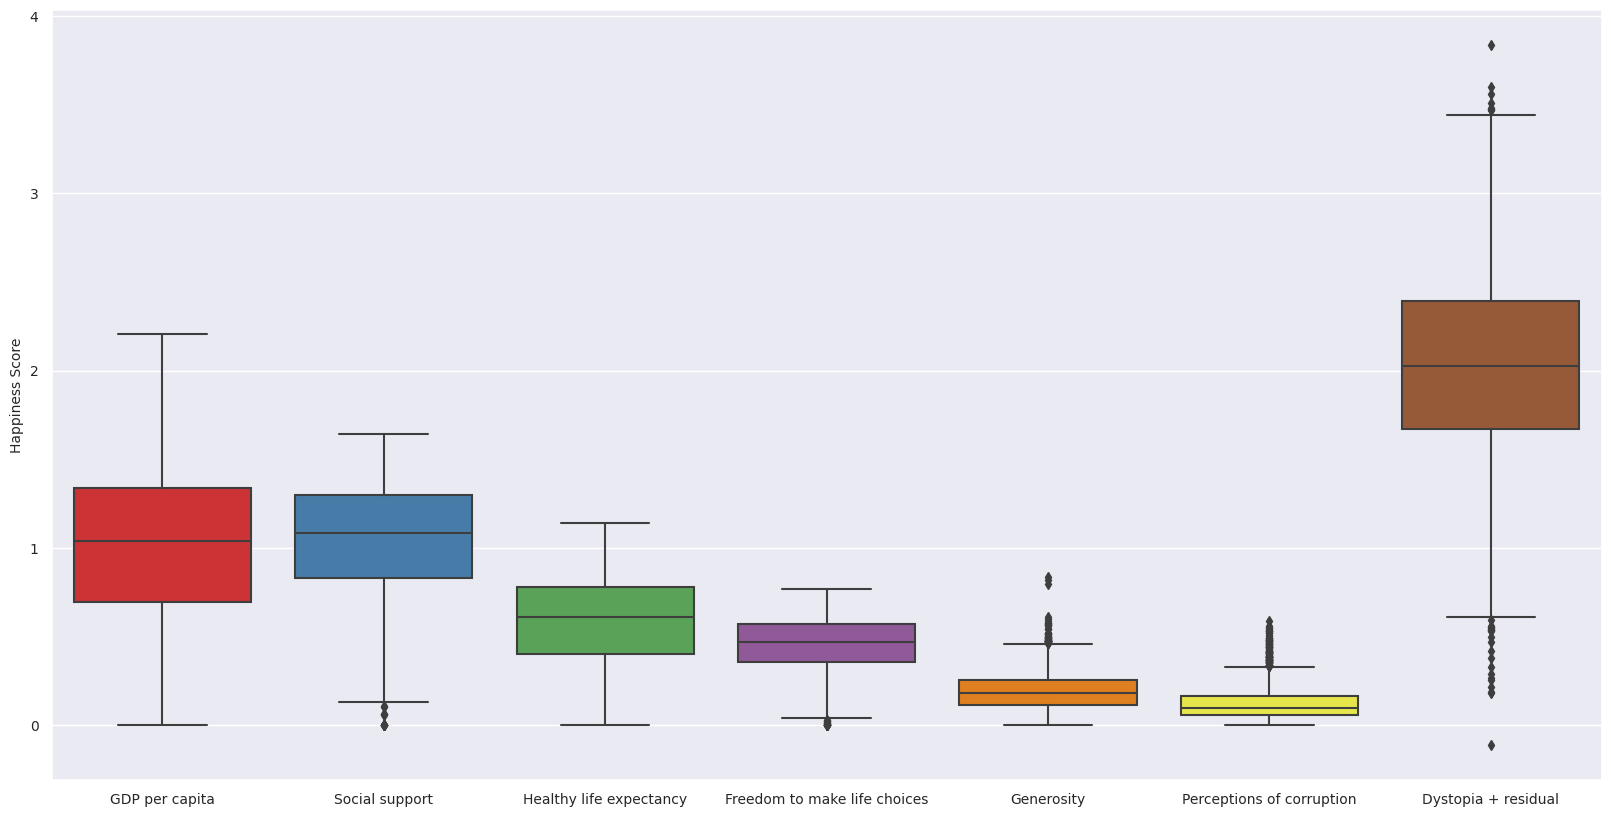

In [35]:
plt.figure(figsize=(20, 10))

list_features = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices',
                 'Generosity','Perceptions of corruption','Dystopia + residual']
sns.boxplot(data = df.loc[:, list_features], orient = "v", palette = "Set1", )

# 변수 이름 조정
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절
plt.ylabel('Happiness Score',fontsize=10)  # y축 변수 이름 조정

plt.show()

In [36]:
import plotly.express as px

# 연도별 행복지수(2015-2023)
fig = px.choropleth(df, locations = "Country", color = "Score", locationmode = "country names", animation_frame = "Year")
fig.update_layout(title = "Happiness Score by Countries")
fig.show()

In [37]:
df.loc[df['Country']=='South Korea']

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
56,South Korea,5.9511,1.852754,1.187915,0.602696,0.446040,0.111635,0.163245,1.586769,2023
195,South Korea,5.9351,1.851089,0.885767,0.841494,0.413863,0.111005,0.176065,1.655827,2022
344,South Korea,5.8455,1.402863,0.758031,0.800660,0.353206,0.133676,0.135363,2.261686,2021
492,South Korea,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596,1.946757,2020
638,South Korea,5.8947,1.300999,1.219190,1.035575,0.159300,0.174697,0.056033,1.948870,2019
797,South Korea,5.8749,1.266307,1.204157,0.954652,0.244194,0.174520,0.051439,1.979627,2018
951,South Korea,5.8380,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378,2017
1109,South Korea,5.8350,1.359477,0.721935,0.886449,0.251681,0.188236,0.077156,2.350147,2016
1255,South Korea,5.9840,1.244606,0.957742,0.965376,0.332085,0.185565,0.078569,2.219777,2015


In [38]:
df.loc[df['Country']=='Japan']

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
46,Japan,6.1290,1.825132,1.396324,0.621749,0.556048,0.009304,0.207125,1.513336,2023
190,Japan,6.0389,1.834505,1.089354,0.866070,0.536542,0.007167,0.218196,1.487031,2022
338,Japan,5.9405,1.389140,0.949250,0.838472,0.503763,0.019543,0.192246,2.048071,2021
493,Japan,5.8708,1.266724,1.332339,1.072881,0.495466,0.035712,0.181440,1.486200,2020
642,Japan,5.8861,1.326505,1.418597,1.088218,0.444960,0.068853,0.140216,1.398727,2019
794,Japan,5.9150,1.294211,1.461602,0.987902,0.553003,0.078607,0.149675,1.390035,2018
947,Japan,5.9200,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,2017
1104,Japan,5.9210,1.380073,1.060542,0.914911,0.467607,0.102243,0.189853,1.805840,2016
1254,Japan,5.9870,1.270736,1.257116,0.991112,0.496147,0.107053,0.180603,1.684351,2015


In [39]:
df.loc[df['Country']=='China']

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
63,China,5.8179,1.510386,1.248759,0.467514,0.665695,0.114550,0.144587,1.666428,2023
208,China,5.5853,1.508446,0.958373,0.704509,0.656482,0.099291,0.142256,1.515917,2022
366,China,5.3391,1.061338,0.784535,0.665028,0.635849,0.092792,0.117312,1.982221,2021
525,China,5.1239,0.990533,1.132081,0.867249,0.601605,0.079021,0.117256,1.336182,2020
677,China,5.1909,1.028510,1.124764,0.893325,0.521174,0.057790,0.099618,1.465677,2019
826,China,5.2458,0.989317,1.141977,0.799402,0.596788,0.028651,0.103335,1.586327,2018
975,China,5.2730,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939,2017
1134,China,5.2450,1.027797,0.793808,0.735615,0.440124,0.049588,0.027452,2.170866,2016
1292,China,5.1400,0.890115,0.946745,0.816581,0.516971,0.081854,0.027812,1.860396,2015


In [40]:
neighbors = df[(df['Country'].isin(['South Korea', 'Japan', 'China']))]
neighbors.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
46,Japan,6.1290,1.825132,1.396324,0.621749,0.556048,0.009304,0.207125,1.513336,2023
56,South Korea,5.9511,1.852754,1.187915,0.602696,0.446040,0.111635,0.163245,1.586769,2023
63,China,5.8179,1.510386,1.248759,0.467514,0.665695,0.114550,0.144587,1.666428,2023
190,Japan,6.0389,1.834505,1.089354,0.866070,0.536542,0.007167,0.218196,1.487031,2022
195,South Korea,5.9351,1.851089,0.885767,0.841494,0.413863,0.111005,0.176065,1.655827,2022


In [41]:
neighbors.reset_index()

,index,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
0,46,Japan,6.1290,1.825132,1.396324,0.621749,0.556048,0.009304,0.207125,1.513336,2023
1,56,South Korea,5.9511,1.852754,1.187915,0.602696,0.446040,0.111635,0.163245,1.586769,2023
2,63,China,5.8179,1.510386,1.248759,0.467514,0.665695,0.114550,0.144587,1.666428,2023
3,190,Japan,6.0389,1.834505,1.089354,0.866070,0.536542,0.007167,0.218196,1.487031,2022
4,195,South Korea,5.9351,1.851089,0.885767,0.841494,0.413863,0.111005,0.176065,1.655827,2022
5,208,China,5.5853,1.508446,0.958373,0.704509,0.656482,0.099291,0.142256,1.515917,2022
6,338,Japan,5.9405,1.389140,0.949250,0.838472,0.503763,0.019543,0.192246,2.048071,2021
7,344,South Korea,5.8455,1.402863,0.758031,0.800660,0.353206,0.133676,0.135363,2.261686,2021
8,366,China,5.3391,1.061338,0.784535,0.665028,0.635849,0.092792,0.117312,1.982221,2021
9,492,South Korea,5.8724,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596,1.946757,2020


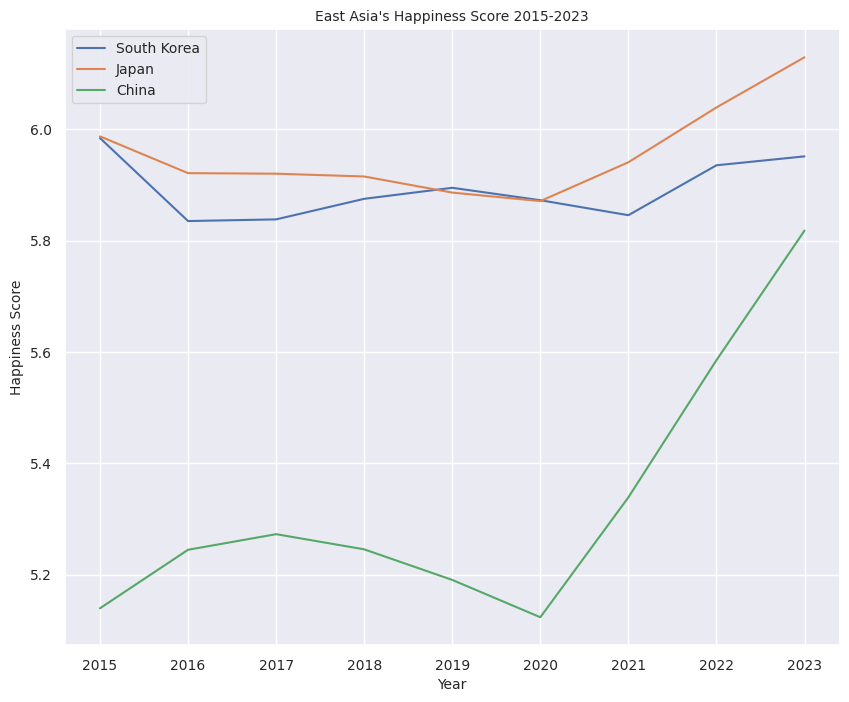

In [42]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Score",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Score",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Score",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Happiness Score', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Happiness Score 2015-2023",fontsize=10)

plt.show()

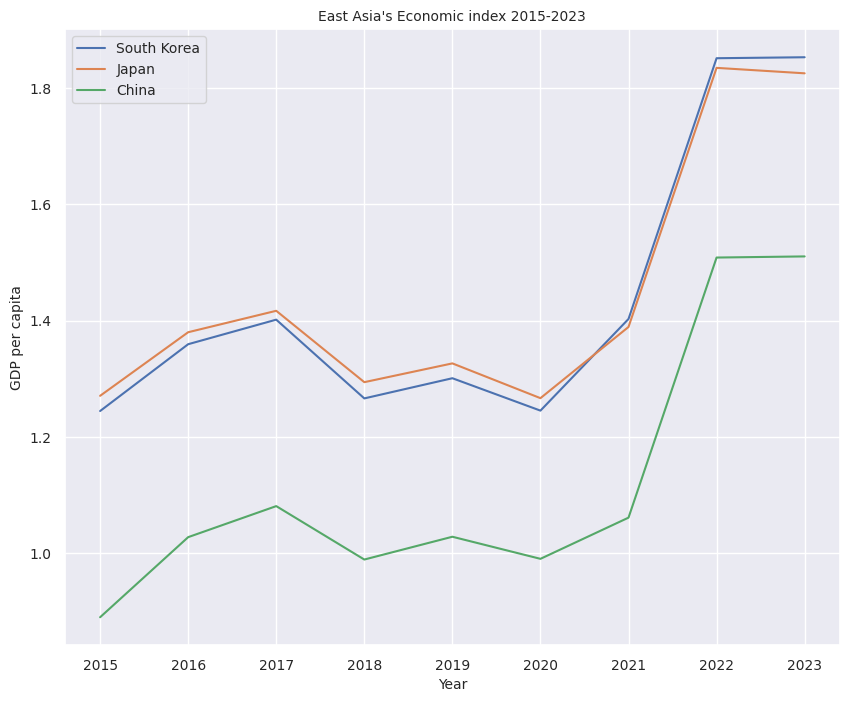

In [43]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="GDP per capita",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('GDP per capita', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Economic index 2015-2023",fontsize=10)

plt.show()

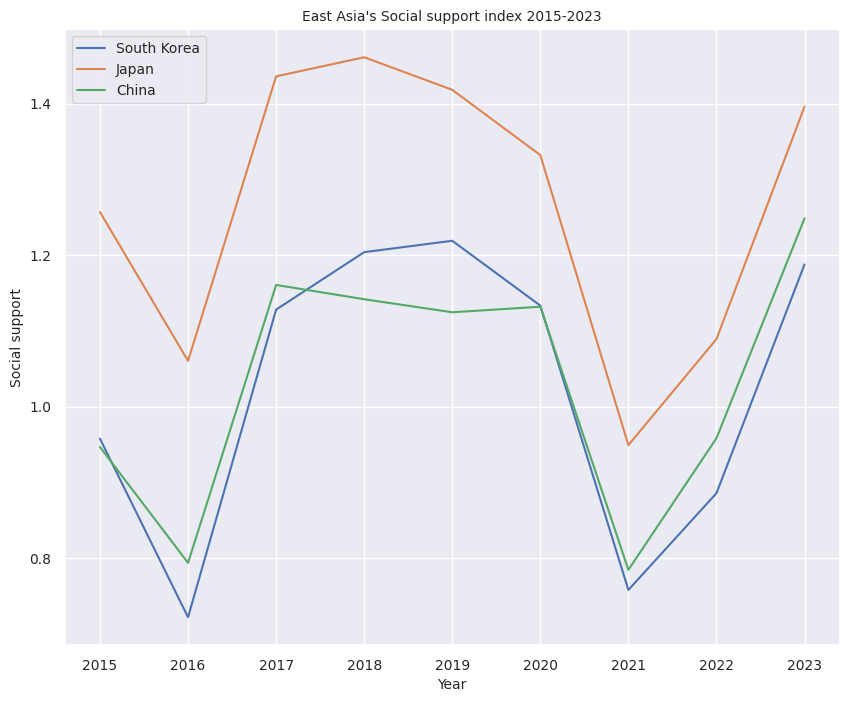

In [44]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Social support",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Social support",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Social support",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Social support', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Social support index 2015-2023",fontsize=10)

plt.show()

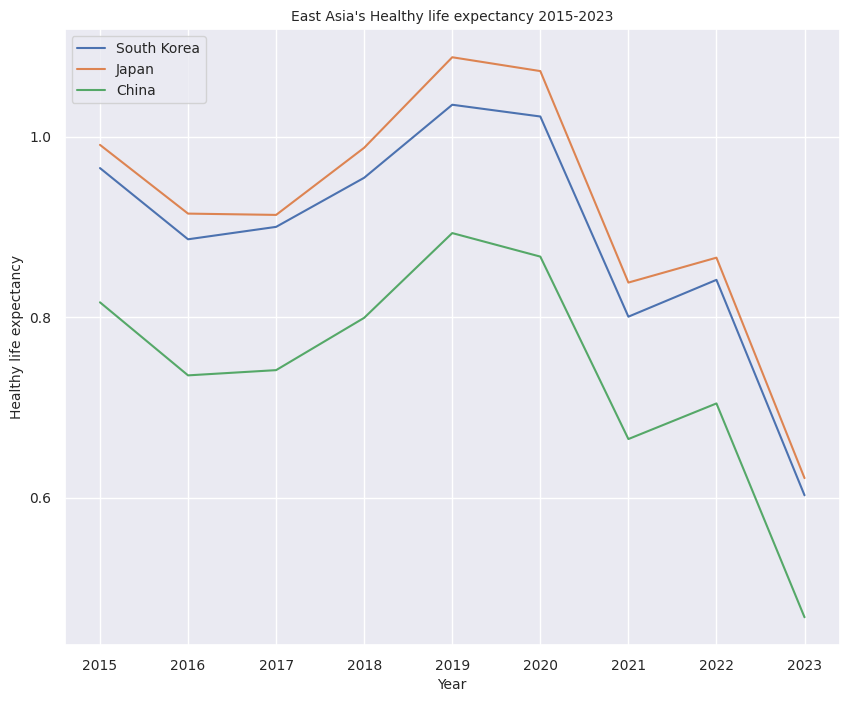

In [45]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Healthy life expectancy",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Healthy life expectancy",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Healthy life expectancy",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Healthy life expectancy', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Healthy life expectancy 2015-2023",fontsize=10)

plt.show()

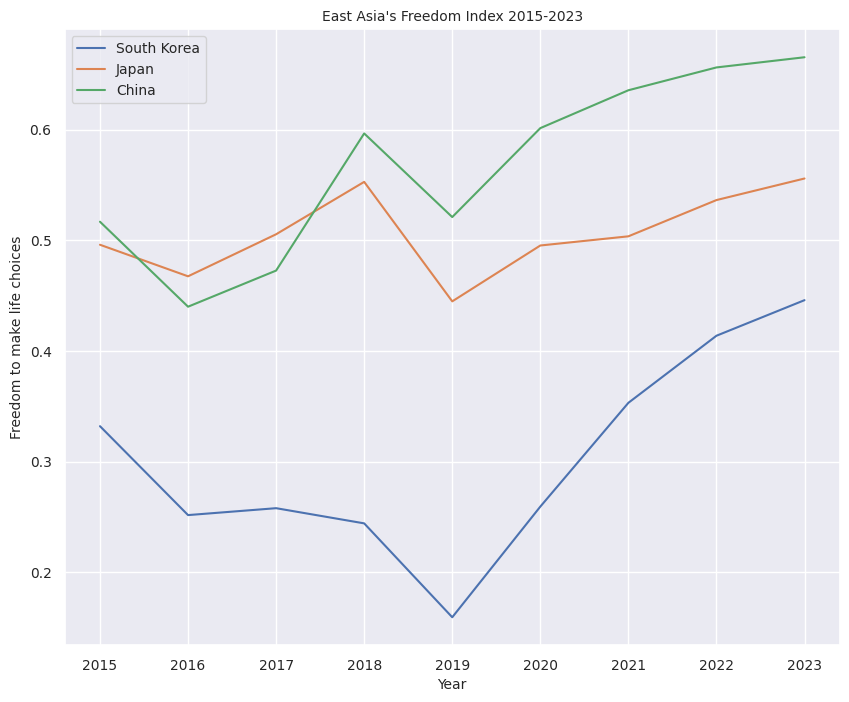

In [46]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Freedom to make life choices",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Freedom to make life choices",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Freedom to make life choices",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Freedom to make life choices', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Freedom Index 2015-2023",fontsize=10)

plt.show()

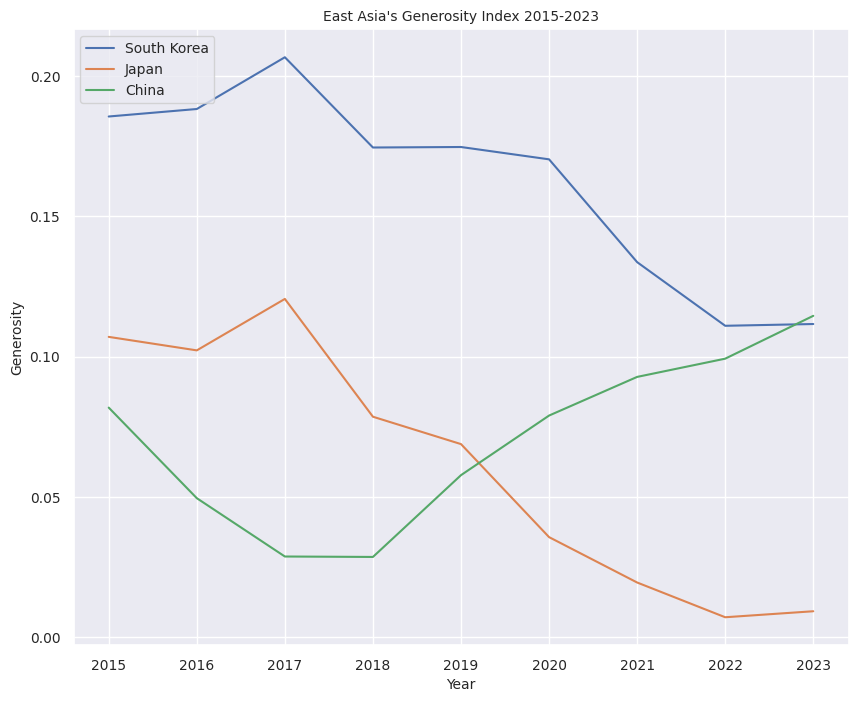

In [47]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Generosity",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Generosity",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Generosity",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Generosity', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Generosity Index 2015-2023",fontsize=10)

plt.show()

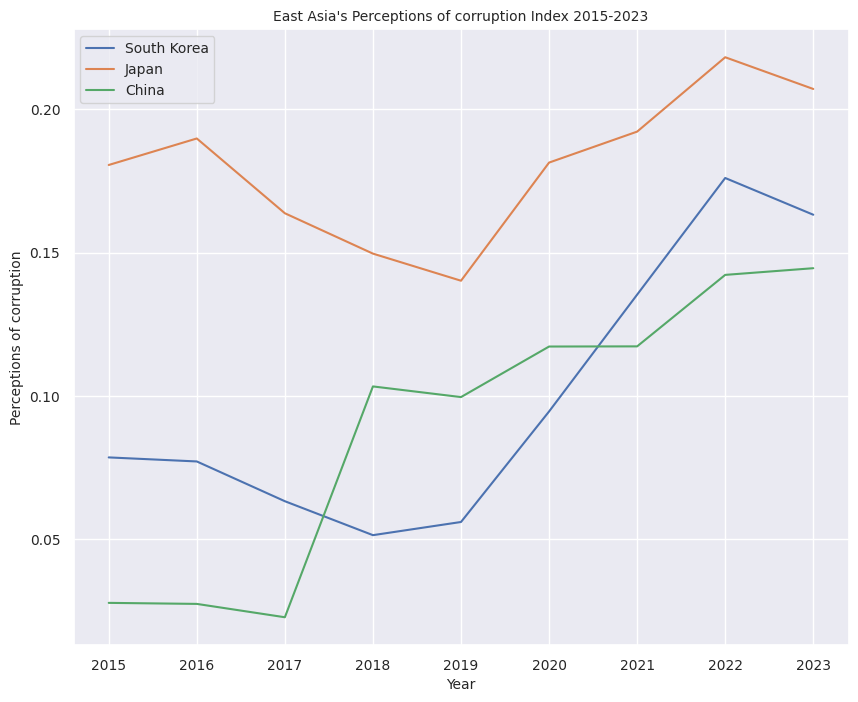

In [48]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Perceptions of corruption",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Perceptions of corruption",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Perceptions of corruption",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Perceptions of corruption', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("East Asia's Perceptions of corruption Index 2015-2023",fontsize=10)

plt.show()

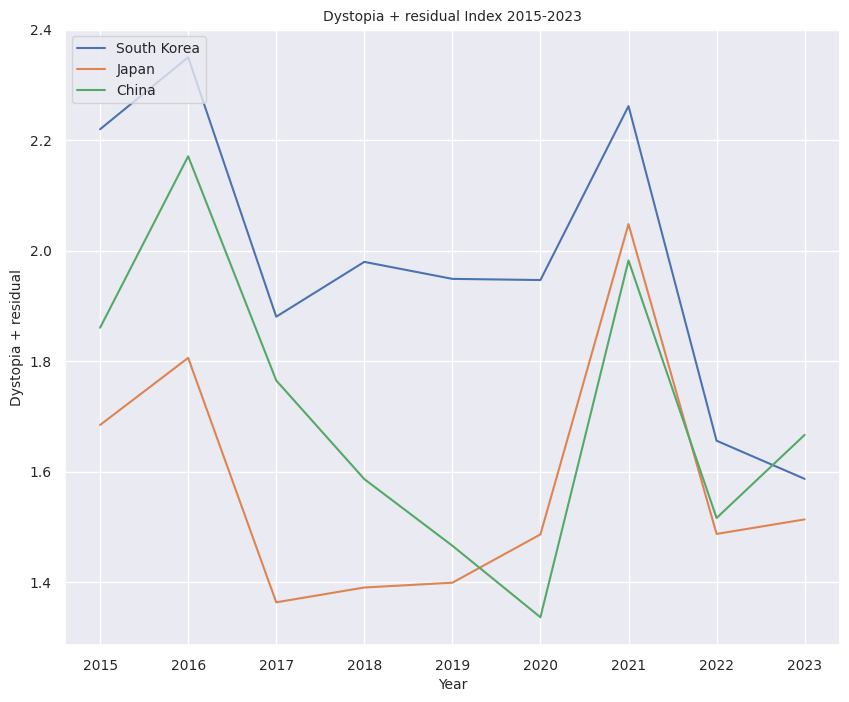

In [49]:
plt.figure(figsize=(10, 8))

df = neighbors[neighbors['Country']=='South Korea']
sns.lineplot(x="Year", y="Dystopia + residual",data=df,label='South Korea')

df = neighbors[neighbors['Country']=='Japan']
sns.lineplot(x="Year", y="Dystopia + residual",data=df,label='Japan')

df = neighbors[neighbors['Country']=='China']
sns.lineplot(x="Year", y="Dystopia + residual",data=df,label='China')

# 변수 이름 조정
plt.xlabel('Year', fontsize=10)  # x축 변수 이름 조정
plt.ylabel('Dystopia + residual', fontsize=10)  # y축 변수 이름 조정

# 그래프에 대한 글꼴 크기 조절
plt.xticks(fontsize=10)  # x축 눈금의 글꼴 크기 조절
plt.yticks(fontsize=10)  # y축 눈금의 글꼴 크기 조절

# 범례 크기와 위치 조정
plt.legend(fontsize=10, loc='upper left')  # 원하는 크기와 위치로 조정

# 변수 간 눈금 표시
plt.xticks(range(2015, 2024, 1))

# 제목 글씨 크기 조정
plt.title("Dystopia + residual Index 2015-2023",fontsize=10)

plt.show()